<h2>Symbolische uitdrukkingen</h2>
<p>We hebben al gezien dat Sage heel goed <em>numeriek</em> kan rekenen, dus rekenen met getallen. Maar ook symbolisch rekenen is geen probleem. Een symbolische variabele kan je maken met behulp van <strong>var</strong>. Hieronder maken we symbolische variabelen $x$, $y$ en $z$.</p>

In [1]:
var('x, y, z')

(x, y, z)

In [2]:
x

x

In [3]:
sin(x)

sin(x)

<p>Deze mogen ook uit meerdere letters bestaan of mogen cijfers of underscores (<strong>_</strong>) bevatten:</p>

In [4]:
var('Mijn_Variabele, h0')

(Mijn_Variabele, h0)

<p>Elke variabele moet expliciet gemaakt worden, behalve $x$ die standaard een symbolische variabele is. Hieronder krijgen we een foutmelding omdat Sage de variabele $w$ niet kent:</p>

In [5]:
sin(w)

NameError: name 'w' is not defined

<p>Sommige eenvoudige vereenvoudigingen worden automatisch gedaan, andere niet:</p>

In [6]:
exp(log(x))

x

In [7]:
sin(x)^2 + cos(x)^2

cos(x)^2 + sin(x)^2

In [8]:
sqrt(8)

2*sqrt(2)

In [9]:
log(64)/log(32)

6/5

<p>Om vereenvoudigingen te forceren, gebruik je de methode <strong>simplify_full</strong> (er bestaan hiernaast een heleboel varianten van <strong>simplify</strong>):</p>

In [10]:
(sin(x)^2 + cos(x)^2).simplify_full()

1

In [11]:
sin(5*x).simplify_full()

(16*cos(x)^4 - 12*cos(x)^2 + 1)*sin(x)

<p>Voor sommige vereenvoudigingen heb je <strong>canonicalize_radical</strong> nodig, wat soms wel onveilig is (waarom?)</p>

In [12]:
(log(x^3)/log(x)).canonicalize_radical()

3

In [13]:
sqrt(x^2).canonicalize_radical()

x

<p>Uitwerken van uitdrukkingen:</p>

In [14]:
f = (x-y)^4

In [15]:
f

(x - y)^4

In [16]:
f.expand()

x^4 - 4*x^3*y + 6*x^2*y^2 - 4*x*y^3 + y^4

<p>Al deze objecten zitten in de <strong>Symbolic Ring</strong>:</p>

In [17]:
parent(x)

Symbolic Ring

In [18]:
parent(f)

Symbolic Ring

In [19]:
parent(f.expand())

Symbolic Ring

<h2>Symbolische functies</h2>
<p>Als volgt kunnen we een <em>symbolische functie</em> definiëren:</p>

In [20]:
f(x) = sin(x^2)

In [21]:
f

x |--> sin(x^2)

In [22]:
f(1)

sin(1)

In [23]:
g(x,y) = log(x) + log(y)

In [24]:
parent(f)

Callable function ring with argument x

In [25]:
parent(g)

Callable function ring with arguments (x, y)

<h3>Plots</h3>
<p>De functie <strong>plot</strong> dient om een functie te tonen. Deze heeft heel veel opties, kijk maar eens naar de voorbeelden in <strong>plot?</strong>. Hieronder tonen we hoe we $f$ kunnen plotten waarbij $x$ van $-5$ tot $5$ loopt:</p>

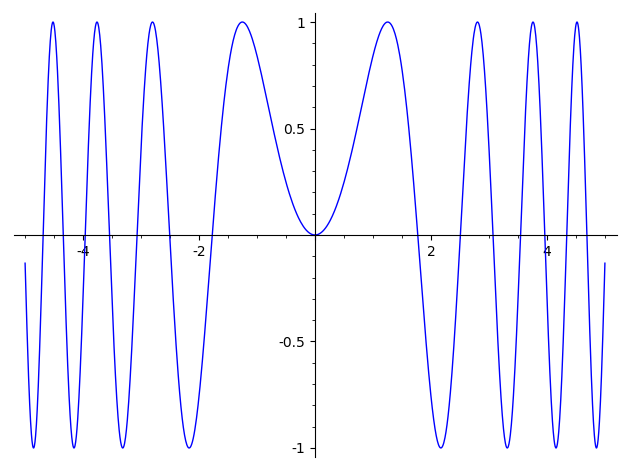

In [26]:
plot(f, (x,-5,5))

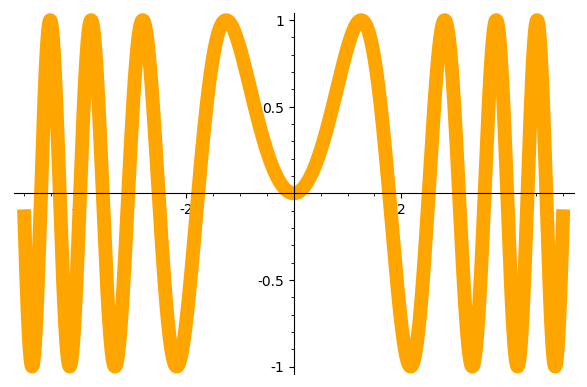

In [27]:
plot(f, (x,-5,5), thickness=10, color='orange')

<p>Het interessante is dat plots op zich ook gewoon objecten zijn en je ze dus aan een variabele kan toekennen en zelfs optellen om meerdere plots samen te voegen:</p>

In [28]:
P1 = plot(x^3-4*x, (x,-2,2))

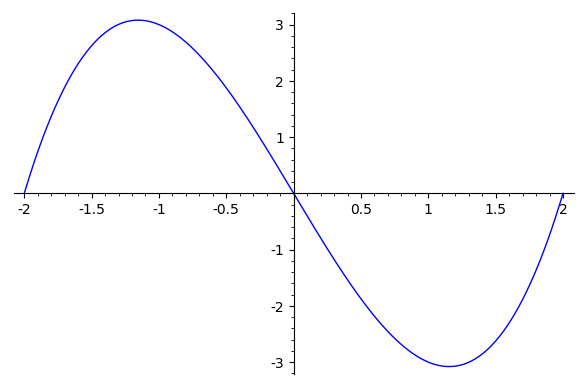

In [29]:
P1

In [30]:
P2 = plot((x^5-16*x)*0.18, (x,-2,2), color='green')

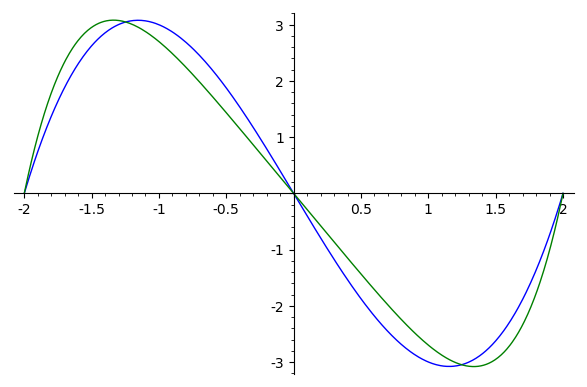

In [31]:
P1 + P2

<p>Met de methode <strong>show()</strong> kan je het uitzicht van een plot nog meer veranderen, zie <strong>P1.show?</strong></p>

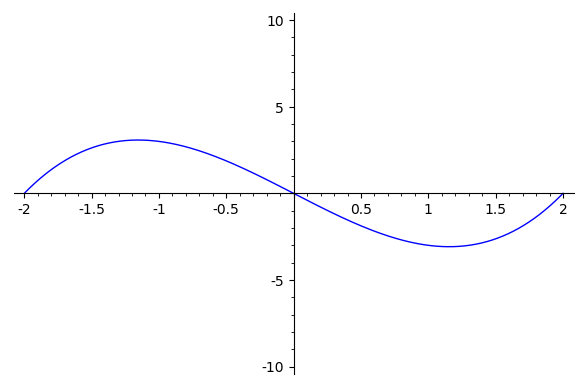

In [32]:
P1.show(ymin=-10, ymax=10)

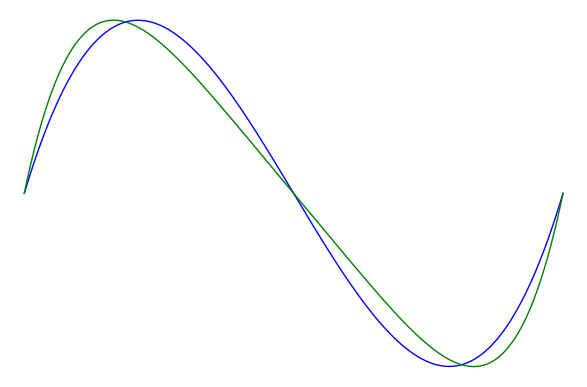

In [33]:
(P1+P2).show(axes=False)

<h3>Afgeleiden</h3>

In [34]:
var('x,y')

(x, y)

In [35]:
f(x) = sin(x)

In [36]:
f.differentiate()

x |--> cos(x)

In [37]:
f.diff()

x |--> cos(x)

<p>We kunnen expliciet de variable-naam opgeven:</p>

In [38]:
f.differentiate(x)

x |--> cos(x)

<p>Wat krijgen we als we $\sin(x)$ afleiden naar $y$?</p>

In [39]:
f.differentiate(y)

x |--> 0

<p>De derde afgeleide naar $x$:</p>

In [40]:
f.differentiate(x,x,x)

x |--> -cos(x)

<p>Een voorbeeld in meerdere veranderlijken:</p>

In [41]:
g(x,y) = sin(x/y)

In [42]:
g.differentiate(y)

(x, y) |--> -x*cos(x/y)/y^2

<p>Eerst afleiden naar $x$, dan naar $y$:</p>

In [43]:
g.differentiate(x,y)

(x, y) |--> -cos(x/y)/y^2 + x*sin(x/y)/y^3

<p>De andere volgorde geeft hetzelfde resultaat:</p>

In [44]:
g.differentiate(y,x)

(x, y) |--> -cos(x/y)/y^2 + x*sin(x/y)/y^3

<p>Als we geen variabele opgeven, krijgen we de gradient (een vector bestaande uit de afgeleiden naar elke veranderlijke):</p>

In [45]:
g.differentiate()

(x, y) |--> (cos(x/y)/y, -x*cos(x/y)/y^2)

<h3>Integralen</h3>
<p>Een onbepaalde integraal:</p>

In [46]:
f.integral(x)

x |--> -cos(x)

<p>Een bepaalde integraal van 0 to $\pi$:</p>

In [47]:
f.integral(x,0,pi)

2

<p>Integralen in meerdere veranderlijken:</p>

In [48]:
g.integral(x)

(x, y) |--> -y*cos(x/y)

In [49]:
g.integral(y)

(x, y) |--> -1/2*x*(Ei(I*x/y) + Ei(-I*x/y)) + y*sin(x/y)

In [50]:
g.integral(x,0,pi)

y |--> -y*cos(pi/y) + y

<p>We zien hier de vreemde functie <strong>Ei</strong> staan. We vragen eventjes om uitleg (dit is gewoon een speciale functie waar je voor de rest niets van hoeft te weten).</p>

In [51]:
Ei?

<p>Sommige functies zijn gewoon te moeilijk om te integreren, je ziet namelijk <strong>integrate()</strong> terugkomen in het resultaat:</p>

In [52]:
(sin(x)/log(x)).integral(x)

-(integrate(cos(x)/(x*log(x)^2), x)*log(x) + cos(x))/log(x)

<h3>Reeksen</h3>
<p>We kunnen ook reekssommen definiëren:</p>

In [53]:
var('i')
sum(i^2, i, 1, 10)

385

<p>Dit werkt ook symbolisch (som tot en met $n$ in plaats van een concreet getal):</p>

In [54]:
var('n')
sum(i^2, i, 1, n)

1/3*n^3 + 1/2*n^2 + 1/6*n

<p>Ook oneindige sommen werken, gebruik <strong>oo</strong> (denk aan het symbool $\infty$) of <strong>Infinity</strong> voor oneindig:</p>

In [55]:
sum( (1/2)^i, i, 1, oo)

1

In [56]:
var('q')
sum( (1/q)^i, i, 1, 10)

(q^9 + q^8 + q^7 + q^6 + q^5 + q^4 + q^3 + q^2 + q + 1)/q^10

In [57]:
sum( (1/q)^i, i, 1, Infinity)

ValueError: Computation failed since Maxima requested additional constraints; using the 'assume' command before evaluation *may* help (example of legal syntax is 'assume(abs(q)-1>0)', see `assume?` for more details)
Is abs(q)-1 positive, negative or zero?

In [58]:
assume(q > 1)
sum( (1/q)^i, i, 1, Infinity)

1/(q - 1)